## Auto encoders

Auto-encoder and its variants are models that can be used for several things: 

- data compression and dimensionality reduction
- Denoising, recolorisation or super resolution
- anomaly detection 

In this notebook we will train our first auto-encoder do to MNIST image reconstruction


###  First auto-encoder without convolutions


Load the mnist dataset into train and test datasets, resize it  normalize them with a minmax scaler

Part one the encoder: its goal is to take an original data and reduce its dimension (here to dimension=30)

Create a first model with (with functional api if keras) with the following layers : 

- A dense Relu layer with 300 neurones
- A dense Relu layer with 30 neurones

Name it  encoder


Now, the decoder. It is the part that takes the compressed data from the encoder and tries to decode it to the original image


Create a second model with the following layers : 

- Relu Dense 200
- Sigmoid Dense 28*28. 

We use sigmoid at the end because MNIST dataset pixels are either black or white. So we can treat that as a classification problem : the output just classify each pixel of the original image



Create an auto-encoder model which is the assembly of both the encoder and the decoder

Train the whole auto-encoder model on the training set. What are the labels that must be used for the .fit method ?

In [ ]:
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Dense 

# on fait du mnist comme d'hab ! 



input = Input((28**2))


x = Dense(200, activation="relu")(input)
x = Dense(30, activation="relu")(x)# the output of this layer is just a 30 dimensional vector 

x = Dense(200, activation="relu")(x)
o = Dense(28*28, activation="sigmoid")(x) #car les pixels de MNIST sont noir(0) ou blanc(1) 



auto_encoder = Model(inputs=input, outputs=o)


In [ ]:
#pareil : x = Dense(30, activation="relu")(x)

## api fonctionnelle : utiliser une couche commme une fonction
layer1 = Dense(30, activation="relu")
print(type(layer1))
x = layer1(x)

<class 'tensorflow.python.keras.layers.core.Dense'>


In [ ]:

from tensorflow.keras.datasets.mnist import load_data

mnist = load_data()
train,test = mnist

x_train, y_train = train 


In [ ]:
# ON NE VA PAS UTILISER y_train : on ne fait pas de la classification d'image 


x_train = x_train.reshape(-1, 28**2) / 255 #(minmax scaling)


In [ ]:
x_train.shape

(60000, 784)

In [ ]:
input = Input((28**2,))

x = Dense(200, activation="relu")(input)
encoder_o = Dense(30, activation="relu")(x)# the output of this layer is just a 30 dimensional vector 

x = Dense(200, activation="relu")(encoder_o)
o = Dense(28*28, activation="sigmoid")(x) #car les pixels de MNIST sont noir(0) ou blanc(1) 


auto_encoder = Model(inputs=input, outputs=o)

encoder =      Model(inputs=input, outputs=encoder_o)


In [ ]:

def apply_decoder(auto_encoder, input):

    o = auto_encoder.layers[-2](input)
    o = auto_encoder.layers[-1](o)
    return o

input_decoder = Input((30,))
decoder = Model(input_decoder, apply_decoder(auto_encoder, input_decoder))




In [ ]:
encoder.predict(x_train[:3]).shape

(3, 30)

In [ ]:

auto_encoder.compile(optimizer="adam", loss="binary_crossentropy") # l'accuracy n'est pas une métrique pertinente ici
auto_encoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1748
Epoch 2/10
 671/1875 [=========>....................] - ETA: 7s - loss: 0.0988

KeyboardInterrupt: 

(784,)


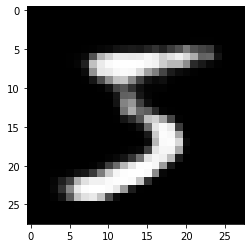

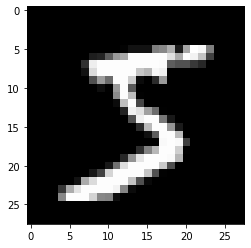

In [ ]:
X_pred = auto_encoder.predict(x_train[:3])

import matplotlib.pyplot as plt 

first_pred = X_pred[0]
print(first_pred.shape)
plt.imshow(first_pred.reshape(28, 28), cmap="gray")
plt.figure()
plt.imshow(x_train[0].reshape(28, 28), cmap="gray")

In [ ]:
import tensorflow
layer = tensorflow.keras.layers.UpSampling2D(
    size=(2, 2), data_format=None, interpolation="nearest"
)

x = Input((2, 2, 1))

y = layer(x)
print(y.shape)

(None, 4, 4, 1)


In [ ]:


X = train 
y = X

auto_encoder.fit(X, X)

result = auto_encoder.predict(X[0]) => resortira un vecteur 
plt.imshow(result.reshape(28, 28), cmap="gray")

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: dense_1/Relu:0


ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'") at layer "dense". The following previous layers were accessed without issue: []

Feed some images to the model and display the reconstructed images along with the original images. 



In [ ]:
def reconstruction_error(X, X_pred):

    return mse(X.reshape(-1, 1), X.reshape(-1, 1))


def is_anomaly(model, X, threshold):
    X_pred = model.predict(X)

    return (reconstruction_error > threshold)
        

## CNN based Auto-encoder

We can of course have auto-encoder with convolutions ! 

We will replace

- Dense layers by convolution layers in the encoder model and add some maxPooling after each convolution
- Dense layers by Upsampling2D layers in the decoder model



1. Create an Upsampling2D layer with Keras

2. Calculate the output of the layer and store the result in the upsampled variable on the array created above.

Reacreate the encoder, decoder and auto-coder model as previously

Reload the MNIST dataset and do the proper scaling and resizing (rember, keras convolutions expects to see a 4D array with the dimensions (nb_exemple, n_col, n_row, n_channel)

Train the auto-encoder model. Display some reconstructed images. Does it work better than the previous model?

Bonus : Denoising auto-encoder. 

Let's say that we have two version of our images : 

- image with noise
- the same image without noise. 

We can ask our auto-encoder to reconstruct clean images from noisy images



Load the Mnist dataset. 


With the noise function bellow, create a corrupted version of MNIST by adding some noise

In [ ]:
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

Display some noisy images and check you can still recognize mnist dataset 

Instanciate a new version of the CNN auto-encoder. Train it now to reconstruct clean images from noisy ones. 

Feed some noisy image to the network and check that it outputs some cleaned images with matplotlib

Search and Think about other applications of auto-encoder 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b859965-b858-4b8d-a841-009599aef86e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>